# Transfer Learning InceptionV3

In [1]:
#First, I need to install Tensorflow
#! pip install tensorflow-gpu

In [2]:
#GPU SpecSheet
!nvidia-smi

Wed Oct 21 21:12:43 2020       
+-----------------------------------------------------------------------------+
| NVIDIA-SMI 455.23.05    Driver Version: 418.67       CUDA Version: 10.1     |
|-------------------------------+----------------------+----------------------+
| GPU  Name        Persistence-M| Bus-Id        Disp.A | Volatile Uncorr. ECC |
| Fan  Temp  Perf  Pwr:Usage/Cap|         Memory-Usage | GPU-Util  Compute M. |
|                               |                      |               MIG M. |
|===============================+======================+======================|
|   0  Tesla T4            Off  | 00000000:00:04.0 Off |                    0 |
| N/A   43C    P8     9W /  70W |      0MiB / 15079MiB |      0%      Default |
|                               |                      |                 ERR! |
+-------------------------------+----------------------+----------------------+
                                                                               
+-------

#### Importing the Libraries and the dataset

In [3]:
from tensorflow.compat.v1 import ConfigProto
from tensorflow.compat.v1 import InteractiveSession

config = ConfigProto()
config.gpu_options.per_process_gpu_memory_fraction = 0.5
config.gpu_options.allow_growth = True
session = InteractiveSession(config=config)

In [4]:
# import the libraries

from tensorflow.keras.layers import Input, Lambda, Dense, Flatten
from tensorflow.keras.models import Model

#from tensorflow.keras.applications.inception_v3 import InceptionV3
#from keras.applications.vgg16 import VGG16
#from tensorflow.keras.applications.resnet152V2 import ResNet152V2

from tensorflow.keras.applications.inception_v3 import preprocess_input
from tensorflow.keras.preprocessing import image
from tensorflow.keras.preprocessing.image import ImageDataGenerator,load_img
from tensorflow.keras.models import Sequential
import numpy as np
from glob import glob
import matplotlib.pyplot as plt

In [5]:
# re-size all the images and importing the dataset from Google Drive
IMAGE_SIZE = [224, 224]

# importing the dataset
train_path = '/content/drive/My Drive/Kaggle Datasets/Cotton Disease/train'
valid_path = '/content/drive/My Drive/Kaggle Datasets/Cotton Disease/test'

In [6]:
import tensorflow as tf

inceptionv3=tf.keras.applications.InceptionV3(
    include_top=False,
    weights="imagenet",
    input_tensor=None,
    input_shape=IMAGE_SIZE + [3]
    )

87916544/87910968 [==============================] - 1s 0us/step


In [7]:
# don't train existing weights
for layer in inceptionv3.layers:
    layer.trainable = False

In [8]:
# useful for getting number of output classes
folders = glob('/content/drive/My Drive/Kaggle Datasets/Cotton Disease/train/*')
folders

['/content/drive/My Drive/Kaggle Datasets/Cotton Disease/train/diseased cotton leaf',
 '/content/drive/My Drive/Kaggle Datasets/Cotton Disease/train/fresh cotton leaf',
 '/content/drive/My Drive/Kaggle Datasets/Cotton Disease/train/fresh cotton plant',
 '/content/drive/My Drive/Kaggle Datasets/Cotton Disease/train/diseased cotton plant']

In [9]:
# our layers - you can add more if you want
x = Flatten()(inceptionv3.output)

In [10]:
prediction = Dense(len(folders), activation='softmax')(x)

# create a model object
model = Model(inputs=inceptionv3.input, outputs=prediction)

In [11]:
# Model Structure
model.summary()

Model: "functional_1"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_1 (InputLayer)            [(None, 224, 224, 3) 0                                            
__________________________________________________________________________________________________
conv2d (Conv2D)                 (None, 111, 111, 32) 864         input_1[0][0]                    
__________________________________________________________________________________________________
batch_normalization (BatchNorma (None, 111, 111, 32) 96          conv2d[0][0]                     
__________________________________________________________________________________________________
activation (Activation)         (None, 111, 111, 32) 0           batch_normalization[0][0]        
_______________________________________________________________________________________

In [12]:
# Assigning cost function and optimizer  to the Model
model.compile(
  loss='categorical_crossentropy',
  optimizer='adam',
  metrics=['accuracy']
)

In [13]:
# Use the Image Data Generator to import the images from the dataset
from tensorflow.keras.preprocessing.image import ImageDataGenerator

train_datagen = ImageDataGenerator(rescale = 1./255,
                                   shear_range = 0.2,
                                   zoom_range = 0.2,
                                   horizontal_flip = True)

test_datagen = ImageDataGenerator(rescale = 1./255)

In [14]:
# Make sure you provide the same target size as initialied for the image size
training_set = train_datagen.flow_from_directory('/content/drive/My Drive/Kaggle Datasets/Cotton Disease/train',
                                                 target_size = (224, 224),
                                                 batch_size = 32,
                                                 class_mode = 'categorical')

Found 1951 images belonging to 4 classes.


In [15]:
test_set = test_datagen.flow_from_directory('/content/drive/My Drive/Kaggle Datasets/Cotton Disease/test',
                                            target_size = (224, 224),
                                            batch_size = 32,
                                            class_mode = 'categorical')

Found 18 images belonging to 4 classes.


In [16]:
# fit the model
# Run the cell. It will take some time to execute
r = model.fit_generator(
  training_set,
  validation_data=test_set,
  epochs=20,
  steps_per_epoch=len(training_set),
  validation_steps=len(test_set)
)

Instructions for updating:
Please use Model.fit, which supports generators.
Epoch 1/20
61/61 [==============================] - 810s 13s/step - loss: 2.8408 - accuracy: 0.6955 - val_loss: 0.4742 - val_accuracy: 0.9444
Epoch 2/20
61/61 [==============================] - 35s 568ms/step - loss: 0.7738 - accuracy: 0.8754 - val_loss: 3.8892e-04 - val_accuracy: 1.0000
Epoch 3/20
61/61 [==============================] - 35s 575ms/step - loss: 0.5107 - accuracy: 0.9190 - val_loss: 0.2563 - val_accuracy: 0.9444
Epoch 4/20
61/61 [==============================] - 35s 572ms/step - loss: 0.4780 - accuracy: 0.9231 - val_loss: 0.0027 - val_accuracy: 1.0000
Epoch 5/20
61/61 [==============================] - 35s 568ms/step - loss: 0.4612 - accuracy: 0.9272 - val_loss: 0.0181 - val_accuracy: 1.0000
Epoch 6/20
61/61 [==============================] - 35s 569ms/step - loss: 0.4355 - accuracy: 0.9221 - val_loss: 0.0099 - val_accuracy: 1.0000
Epoch 7/20
61/61 [==============================] - 34s 561ms/s

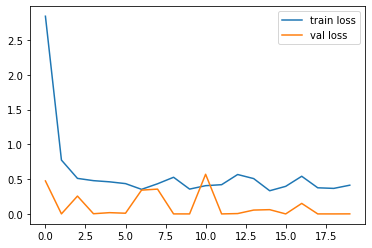

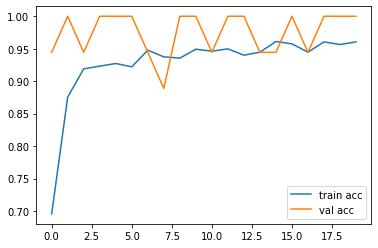

<Figure size 432x288 with 0 Axes>

In [17]:
# plot the loss
plt.plot(r.history['loss'], label='train loss')
plt.plot(r.history['val_loss'], label='val loss')
plt.legend()
plt.show()
plt.savefig('LossVal_loss')

# plot the accuracy
plt.plot(r.history['accuracy'], label='train acc')
plt.plot(r.history['val_accuracy'], label='val acc')
plt.legend()
plt.show()
plt.savefig('AccVal_acc')

In [18]:
# save it as a h5 file
from tensorflow.keras.models import load_model
model.save('inceptionv3.h5')

In [19]:
y_pred = model.predict(test_set)
y_pred

array([[4.5952664e-33, 1.0000000e+00, 2.9430895e-23, 2.6703934e-18],
       [1.0000000e+00, 0.0000000e+00, 7.0419021e-36, 0.0000000e+00],
       [1.9902654e-20, 5.2536295e-17, 1.0000000e+00, 3.9254498e-23],
       [1.1767799e-28, 1.0000000e+00, 9.2087770e-16, 4.7460924e-11],
       [0.0000000e+00, 1.0000000e+00, 0.0000000e+00, 0.0000000e+00],
       [1.0000000e+00, 1.8171022e-10, 2.4142840e-19, 1.1811279e-22],
       [2.4271000e-35, 4.7061364e-28, 2.3297864e-28, 1.0000000e+00],
       [2.2393916e-09, 1.5273117e-05, 5.9377996e-04, 9.9939096e-01],
       [8.6270802e-18, 9.2996156e-04, 1.4453160e-16, 9.9907011e-01],
       [2.7502065e-09, 1.1507053e-02, 6.8442697e-16, 9.8849291e-01],
       [2.4640618e-04, 1.0306387e-24, 9.9975353e-01, 1.2312453e-27],
       [5.7475007e-28, 0.0000000e+00, 1.0000000e+00, 0.0000000e+00],
       [0.0000000e+00, 1.0000000e+00, 2.7172953e-31, 0.0000000e+00],
       [1.0000000e+00, 3.0970551e-29, 1.8038833e-25, 0.0000000e+00],
       [0.0000000e+00, 1.6612694e-

In [20]:
import numpy as np
y_pred = np.argmax(y_pred, axis=1)
y_pred

array([1, 0, 2, 1, 1, 0, 3, 3, 3, 3, 2, 2, 1, 0, 3, 2, 1, 2])